In [2]:
#IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

%matplotlib inline

In [3]:
#LOADING THE DATSET
df = pd.read_csv("/content/drive/MyDrive/bankloans.csv")
df.head()  #df.head() gives us the first 5 entries of the dataset

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
#checks in each columns how many null values are there
df.isnull().sum()

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,450


In [5]:
#count of unique rows in the datset
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt   default
56   1   11      20       59      15.0     4.672800  4.177200  0.0        1
20   1   4       0        14      9.7      0.200984  1.157016  1.0        1
     3   0       1        17      2.3      0.043792  0.347208  0.0        1
21   1   1       1        16      6.3      0.141120  0.866880  0.0        1
                          18      17.3     0.158814  2.955186  0.0        1
                                                                         ..
22   1   4       3        14      17.5     0.225400  2.224600  0.0        1
                 2        24      15.6     1.636128  2.107872  1.0        1
                 1        16      1.2      0.084480  0.107520  0.0        1
         1       3        17      18.6     0.806310  2.355690  0.0        1
                 0        18      4.4      0.270072  0.521928  0.0        1
Name: count, Length: 700, dtype: int64

In [6]:
#drops all the rows where there is any unavailable value
df = df.dropna()

<Axes: xlabel='age', ylabel='income'>

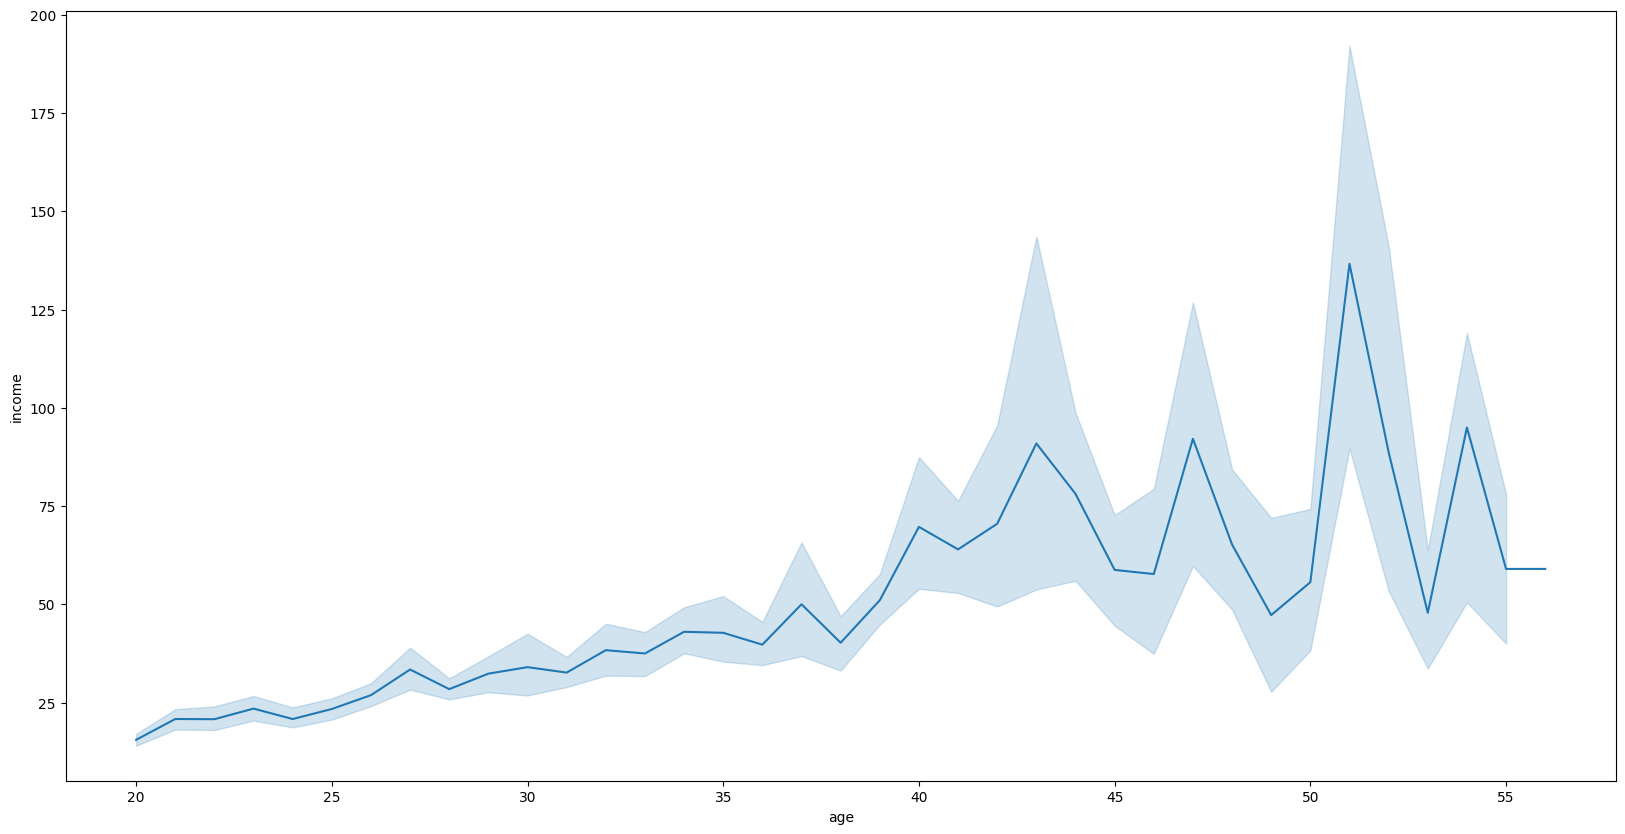

In [7]:
# create a figure and axis with a specified size (20 inches wide, 10 inches tall)
fig, ax = plt.subplots(figsize=(20,10))

# plot a line chart using Seaborn:
# x-axis: 'age' column from the DataFrame
# y-axis: 'income' column from the DataFrame
# data: DataFrame 'df'
# ax: use the Axes object we created earlier
sns.lineplot(x='age', y='income', data=df, ax=ax)

<Axes: xlabel='age', ylabel='debtinc'>

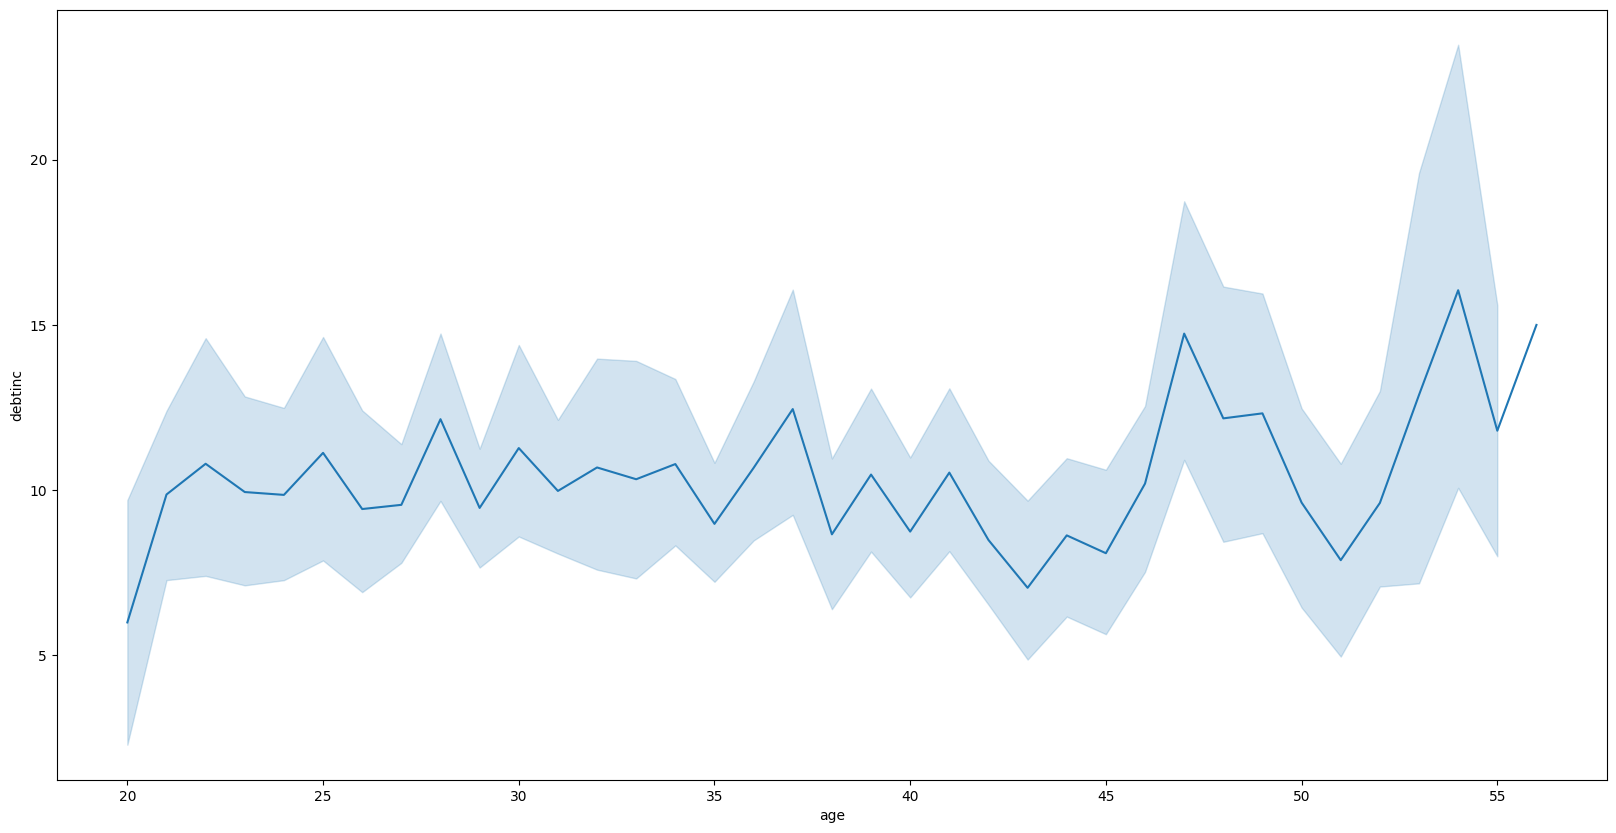

In [8]:
# create a figure and axis with a specified size (20 inches wide, 10 inches tall)
fig, ax = plt.subplots(figsize=(20,10))

# plot a line chart using Seaborn:
# x-axis: 'age' column from the DataFrame
# y-axis: 'debtinc' column from the DataFrame
# data: DataFrame 'df'
# ax: use the Axes object we created earlier
sns.lineplot(x='age', y='debtinc', data=df, ax=ax)

In [9]:
df['default'].value_counts()

,count
default,
0.0,517
1.0,183


In [10]:
# creating our training and test dataset
x=df.drop(['default'],axis=1)
y=df['default']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42) #random_state value will make sure that the values provided on train and test are based on normal distribution, random_state value should be between 40 to 50 to work best for all the models.


In [11]:
# scaling the date
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

# **Creating Model**

RANDOM FOREST

In [12]:
rfc = RandomForestClassifier(n_estimators=200)  # n_estimators is the no. of trees i am going to use

In [13]:
# fit our data
rfc.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=200)

In [14]:
# check the score and the score will be tested using the tested values
rfc.score(xtest, ytest)

0.8214285714285714

0.8 = 80% of the score we are getting with random forest.

In [15]:
#using cross validation score to find optimal score
rfc2 = cross_val_score(estimator=rfc, X=xtrain, y=ytrain, cv=10)
print(rfc2.mean())
# cv equals to how many times are we going to take this cross_val_score, cv=10 means 10 times you have to execute rfc.fit(xtrain,ytrain) take the mean of all those things and put them in the new model rf2.

0.7839285714285713


78.39% optimal score from random forest.

SVM

In [16]:
sv = SVC()
sv.fit(xtrain,ytrain)


SVC()

In [17]:
sv.score(xtest,ytest)

0.7928571428571428

In [18]:
model = GridSearchCV(sv, {
    'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
    'gamma' : [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
    'kernel' : ['rbf', 'linear']
}, scoring='accuracy', cv=10)

In [19]:
model.fit(xtrain, ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [20]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [21]:
model2 = SVC(C=0.1, gamma=0.1, kernel='linear')
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.8214285714285714

LOGISTIC REGRESSION

In [22]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [23]:
lr.score(xtest,ytest)

0.8357142857142857

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

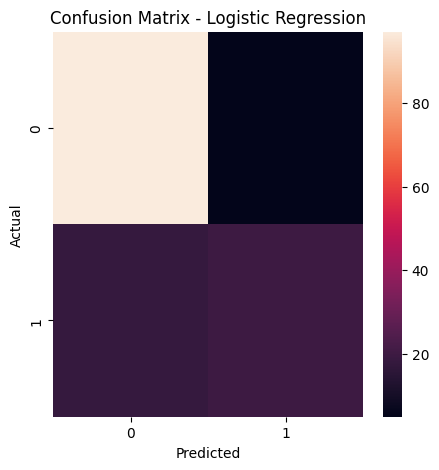

In [24]:
yp = lr.predict(xtest)
c = confusion_matrix(ytest,yp)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(c, ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix - Logistic Regression")